In [1]:
import pygame
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

pygame 2.5.2 (SDL 2.28.3, Python 3.10.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [33]:
def get_axes(joystick):
    ax0 = int(round(joystick.get_axis(0)*100))
    ax1 = int(round(-joystick.get_axis(1)*100))
    ax2 = int(round(joystick.get_axis(2)*100))
    ax3 = int(round(joystick.get_axis(3)*100))
    return ax0, ax1, ax2, ax3

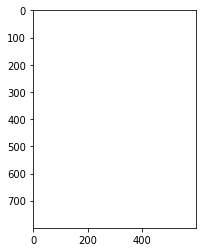

In [31]:
img_blank = 255*np.ones((800, 600, 3), dtype="uint8")
img = img_blank
plt.imshow(img_blank)

In [46]:
# Initialize Pygame
pygame.init()

# Check for available joysticks
joystick_count = pygame.joystick.get_count()
print(f"Number of joysticks found: {joystick_count}")

joystick = pygame.joystick.Joystick(0)
joystick.init()

print(f"Joystick Name: {joystick.get_name()}")
print(f"Number of Axes: {joystick.get_numaxes()}")
print(f"Number of Buttons: {joystick.get_numbuttons()}")

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
font_color = (255, 0, 0)  # BGR color (white in this case)
font_thickness = 2

print("Press ESC to stop")

while True:
    # Handle events
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            exit()

    ax0, ax1, ax2, ax3 = get_axes(joystick)


    
    x = ax0
    y = ax1
    r = ax2
    
    pt_left_0 = np.array([150, 650])
    pt_left = pt_left_0 + np.array([x, -y])
    
    pt_right_0 = np.array([450, 650])
    pt_right = pt_right_0 + np.array([r, 0])
    
    
    img = img_blank.copy()
    
    cv2.line(img, (30, 650), (270, 650), (0,0,0), 1)
    cv2.line(img, (150, 530), (150, 770), (0,0,0), 1)
    cv2.line(img, (330, 650), (570, 650), (0,0,0), 1)
    cv2.line(img, (450, 530), (450, 770), (0,0,0), 1)
    # Draw a line from A to B on the image
    color = (255, 0, 0)  # BGR color (green in this case)
    thickness = 4
    cv2.line(img, pt_left_0, pt_left, color, thickness)
    cv2.circle(img, pt_left, 10, color, -1)
    
    
    
    cv2.line(img, pt_right_0, pt_right, color, thickness)
    cv2.circle(img, pt_right, 10, color, -1)

    cv2.putText(img, f"Omni Wheels", (20, 30), font, font_scale, font_color, font_thickness)  
    
    cv2.putText(img, f"Controller", (20, 520), font, font_scale, font_color, font_thickness)   
    cv2.putText(img, f"X {x}", (20, 790), font, font_scale, font_color, font_thickness)    
    cv2.putText(img, f"Y {y}", (170, 790), font, font_scale, font_color, font_thickness)
    cv2.putText(img, f"R {r}", (400, 790), font, font_scale, font_color, font_thickness)
    
    cv2.imshow("Omni Wheel Sim", img)
    
    # Break the loop if 'q' key is pressed
    if cv2.waitKey(10) & 0xFF == 27:
        pygame.quit()
        break
    
    
    
    #time.sleep(0.01)
cv2.destroyAllWindows()
pygame.quit()

Number of joysticks found: 1
Joystick Name: Xbox 360 Controller
Number of Axes: 6
Number of Buttons: 11
Press ESC to stop
